In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import http.client
from urllib.parse import urlencode
import time
from hashlib import sha1
import random
import string
import json
import numpy as np
import seaborn as sb
import numpy as np
import pandas as pd
sb.set(rc={"figure.figsize":(14,8)})

In [6]:
district =      'gr%C3%B6ndal'
district =      's%C3%B6dermalm'
startDate =     '20160101'
endDate =       '20160901'
callerId =      'hjartarson'
privateKey =    'wKalNs1fMuymxyXtN9wPwEypXpwtVWA3JT4uepf8'
minLivingArea = 40
maxLivingArea = 70

2016-01-01
Objects:  68
2016-02-01
Objects:  90
2016-03-01
Objects:  114
2016-04-01
Objects:  124
2016-05-01
Objects:  129
2016-06-01
Objects:  91
2016-07-01
Objects:  41
2016-08-01
Objects:  78


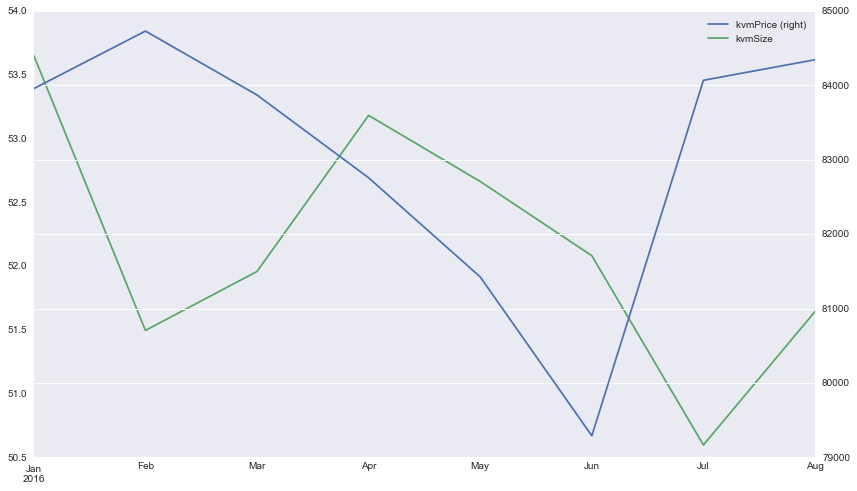

In [7]:
dateArray = [d.strftime('%Y-%m-%d') for d in pd.date_range(startDate,endDate,freq='MS')]

timestamp = str(int(time.time()))
unique = ''.join(random.choice(string.ascii_uppercase + string.digits) for x in range(16))
hashstr = sha1((callerId+timestamp+privateKey+unique).encode('utf-8')).hexdigest()

kvmPriceMonth=[]
kvmSizeMonth=[]
kvmData = {'kvmPrice' : [],
           'kvmSize' : []}

for i in range(len(dateArray)-1):
    print(dateArray[i])
    url = ("/sold?q="+district+"&"
            "minSoldDate="+dateArray[i]+"&"
            "maxSoldDate="+dateArray[i+1]+"&"
            "minLivingArea="+str(minLivingArea)+"&"
            "maxLivingArea="+str(maxLivingArea)+"&"
            "limit=10000&"
            "callerId="+callerId+"&time="+timestamp+"&unique="+unique+"&hash="+hashstr)
    connection = http.client.HTTPConnection("api.booli.se")
    connection.request("GET", url)
    response = connection.getresponse()
    data = response.read().decode('utf8')
    connection.close()
    time.sleep(1)
    if response.status != 200:
        print("fail")
        kvmData['kvmPrice'].append(0)
        kvmData['kvmSize'].append(0)
    else:
        result = json.loads(data)
        with open('data.txt', 'w') as outfile:
            json.dump(data, outfile)
        count = result['totalCount']
        print("Objects: ",str(count))
        
        kvmPrice=[]
        kvmSize=[]
        for i in range(count):
            try:
                kvmPrice.append(result['sold'][i]['soldPrice']/result['sold'][i]['livingArea'])
                kvmSize.append(result['sold'][i]['livingArea'])
            except:
                print("info missing")
        nrObjects = count
        kvmData['kvmSize'].append(np.mean(kvmSize))
        kvmData['kvmPrice'].append(np.mean(kvmPrice))
    
df = pd.DataFrame(kvmData,index=pd.to_datetime(dateArray[0:-1]))

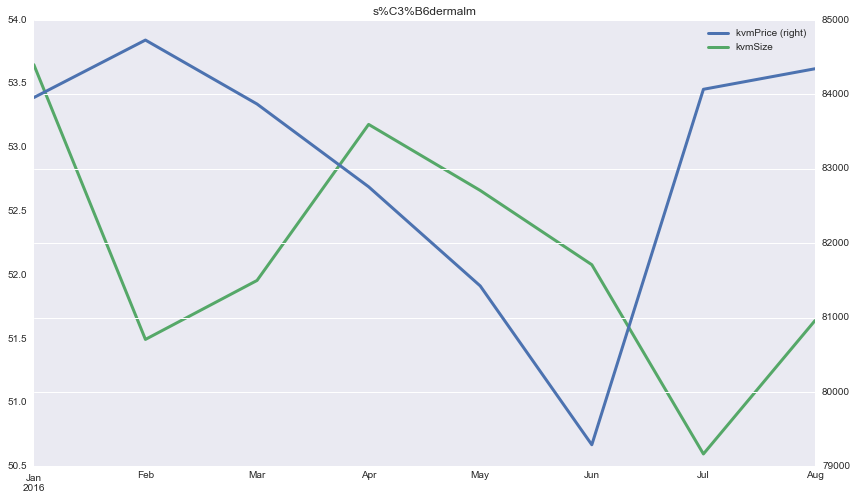

In [10]:
df.plot(secondary_y=['kvmPrice'],linewidth=3,title=district)
plt.show()

In [11]:
result

{'count': 78,
 'limit': 1000,
 'offset': 0,
 'searchParams': {'areaId': 115341,
  'maxLivingArea': '70',
  'maxSoldDate': '2016-09-01',
  'minLivingArea': '40',
  'minSoldDate': '2016-08-01'},
 'sold': [{'booliId': 2127961,
   'constructionYear': 1987,
   'floor': 0,
   'listPrice': 3675000,
   'livingArea': 61,
   'location': {'address': {'streetAddress': 'Timmermansgränd 3'},
    'distance': {'ocean': 1099},
    'namedAreas': ['Södermalm Maria'],
    'position': {'isApproximate': True,
     'latitude': 59.3125478,
     'longitude': 18.0626574},
    'region': {'countyName': 'Stockholms län',
     'municipalityName': 'Stockholm'}},
   'objectType': 'Lägenhet',
   'published': '2016-08-17 15:56:48',
   'rent': 2796,
   'rooms': 2.5,
   'soldDate': '2016-08-30',
   'soldPrice': 3800000,
   'source': {'id': 1610,
    'name': 'HusmanHagberg',
    'type': 'Broker',
    'url': 'http://www.husmanhagberg.se/'},
   'url': 'https://www.booli.se/annons/2127961'},
  {'booliId': 2151931,
   'floor'